<a href="https://colab.research.google.com/github/toot09/keras_basic/blob/master/Keras_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스(Keras) 기초부터 모델 생성까지

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png">

- 파이썬으로 작성된 고수준 신경망 API로 TensorFlow, CNTK, 혹은 Theano와 함께 사용 가능
- 사용자 친화성, 모듈성, 확장성을 통해 빠르고 간편한 프로토타이핑 가능
- 컨볼루션 신경망, 순환 신경망, 그리고 둘의 조합까지 모두 지원
- CPU와 GPU에서 매끄럽게 실행

In [1]:
import numpy as np
import tensorflow as tf

tf.__version__

'2.5.0'

레이어들을 import하는 방식 (1)
- 일일이 import 하지 않아도 됨

- 코드가 다소 길어질 수 있음

In [2]:
from tensorflow import keras

keras.__version__

'2.5.0'

In [3]:
keras.layers.Dense(10, activation='sigmoid')

In [ ]:
keras.Model()

In [ ]:
keras.models.Sequential()

레이어들을 import하는 방식 (2)
- 일일이 import 해야함
- 코드가 간결

In [5]:
from tensorflow.keras.layers import Dense, Input, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model

In [7]:
Dense(10, activation='sigmoid')

In [6]:
Flatten(input_shape=[28,28])

In [8]:
X_train = np.random.randn(5,10)
Input(shape=X_train.shape[1:])

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'input_1')>

In [9]:
print(X_train.shape)
print(X_train.shape[1:])

(5, 10)
(10,)


## 주요 레이어

### Dense

- Dense 는 입력과 출력을 모두 연결해주는 NN 레이어이다. keras에서는 Dense가 클래스로 구현되어 있다. Dense로 만든 node는 각각 W, B를 가진다. model의 fit함수를 호출하여 학습시킨다.

- Fully-Connected Layer

- 노드수(유닛수), 활성화 함수 등을 지정

- name을 통한 레이어간 구분 가능

- 기본적으로  
  'Glorot_uniform' 가중치(Xabier 분포 초기화), zeros bias로 초기화
  - kernel_initializer 인자를 통해 다른 가중치 초기화를 진행할 수 있음

In [10]:
dense = Dense(10, activation='relu', name='Dense Layer')

In [11]:
dense

In [12]:
dense2 = Dense(15, activation='softmax')

In [13]:
dense2

### Activation
- Dense layer에서 미리 활성화함수를 지정할 수도 있지만 때에 따라서 따로 레이어를 만들어줄 수 있음

In [14]:
dense = Dense(10, kernel_initializer='he_normal', name='Dense Layer')
dense = Activation(dense)
dense

### Flatten
- 배치 크기(또는 데이터 크기)를 제외하고 데이터를 1차원으로 쭉 펼치는 작업

- 예시)
        (128, 3, 2, 2) ---> (128, 12)
      

In [20]:
x = Flatten(input_shape=(28,28))

### Input 
- 모델의 입력을 정의

- shape, dtype을 포함

- 하나의 모델은 여러 개의 입력을 가질 수 있음

- 'summary()' 메소드를 통해서는 보이지 않음

In [22]:
input_1 = Input(shape=(28,28), dtype=tf.float32)
input_2 = Input(shape=(8,), dtype=tf.int32)

In [23]:
input_1

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_3')>

In [24]:
input_2

<KerasTensor: shape=(None, 8) dtype=int32 (created by layer 'input_4')>

## 모델 구성 방법
- Sequential()

- 서브클래싱(Subclassing)

- 함수형 API

### Sequential()

- 모델이 순차적으로 진행할 때 사용

- 간단한 방법
  - Sequential 객체 생성 후, **add**를 통한 방법
  
  - Sequential 인자에 한번에 추가

- 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없음


In [27]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model

In [36]:
model = Sequential()
model.add(Input(shape=(28,28)))
model.add(Dense(300, activation='relu', name='Layer1'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

모델 구조 확인
- model 객체의 **summary()** 이용

In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 28, 300)           8700      
_________________________________________________________________
dense_11 (Dense)             (None, 28, 100)           30100     
_________________________________________________________________
dense_12 (Dense)             (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


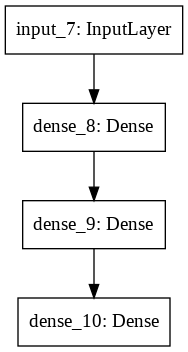

In [35]:
plot_model(model)

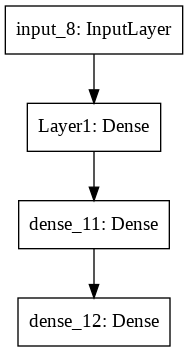

In [38]:
plot_model(model, to_file='model1.png')

In [39]:
!ls

model1.png  model.png  sample_data


In [41]:
model = Sequential([Input(shape=(28,28), name='Input'),
                   Dense(300, activation='relu', name='Dense1'),
                   Dense(100, activation='relu', name='Dense2'),
                   Dense(10, activation='softmax', name='Output')])

In [42]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 28, 300)           8700      
_________________________________________________________________
Dense2 (Dense)               (None, 28, 100)           30100     
_________________________________________________________________
Output (Dense)               (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


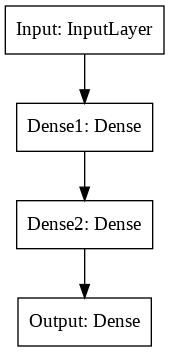

In [43]:
plot_model(model)

### 함수형 API

- 가장 권장되는 방법

- 모델을 복잡하고, 유연하게 구성 가능

- 다중 입출력을 다룰 수 있음

In [45]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.utils import plot_model

In [47]:
inputs = Input(shape=(28,28))
x = Flatten(input_shape=(28,28,1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(100, activation='softmax')(x)

In [48]:
model = Model(inputs=inputs, outputs=x)

In [49]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_14 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
Total params: 275,700
Trainable params: 275,700
Non-trainable params: 0
_________________________________________________________________


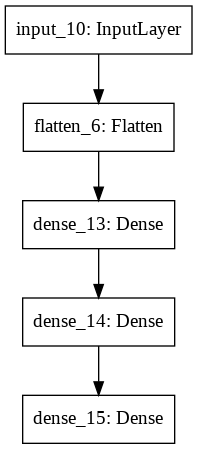

In [50]:
plot_model(model)

In [56]:
from tensorflow.keras.layers import Concatenate

input_layer = Input(shape=(28,28))
hidden1 = Dense(100, activation='relu', name='hidden1')(input_layer)
hidden2 = Dense(30, activation='relu', name='hidden2')(hidden1)
concat = Concatenate()([input_layer, hidden2])
output = Dense(1)(concat)

model = Model(inputs=[input_layer], outputs=[output])

In [57]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
hidden1 (Dense)                 (None, 28, 100)      2900        input_12[0][0]                   
__________________________________________________________________________________________________
hidden2 (Dense)                 (None, 28, 30)       3030        hidden1[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 28, 58)       0           input_12[0][0]                   
                                                                 hidden2[0][0]              

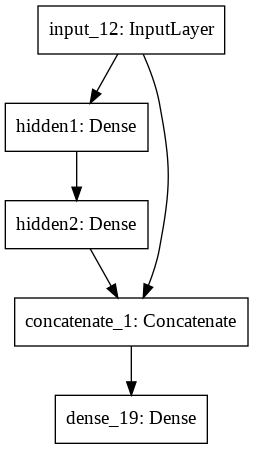

In [58]:
plot_model(model)

In [71]:
input_1 = Input(shape=(10,10))
input_2 = Input(shape=(10,28))
hidden1 = Dense(300, activation='relu', name='hidden1')(input_2)
hidden2 = Dense(100, activation='sigmoid', name='hidden2')(hidden1)
concat = Concatenate()([input_1, hidden2])
ouput = Dense(10, activation='softmax', name='output')(concat)

model = Model(inputs=[input_1, input_2], outputs=[ouput])

In [72]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_30 (InputLayer)           [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
hidden1 (Dense)                 (None, 10, 300)      8700        input_30[0][0]                   
__________________________________________________________________________________________________
input_29 (InputLayer)           [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
hidden2 (Dense)                 (None, 10, 100)      30100       hidden1[0][0]                    
____________________________________________________________________________________________

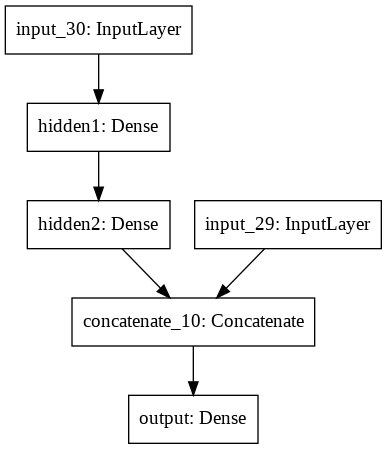

In [73]:
plot_model(model)

In [75]:
input = Input(shape=(28,28))

hidden1 = Dense(300, activation='relu')(input)
hidden2 = Dense(100, activation='relu')(hidden1)

main_output = Dense(1, activation='sigmoid')(hidden2)
sub_output = Dense(1)(hidden2)

model = Model(inputs=[input], outputs=[main_output, sub_output])

In [76]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_32 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 28, 300)      8700        input_32[0][0]                   
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 28, 100)      30100       dense_25[0][0]                   
__________________________________________________________________________________________________
dense_27 (Dense)                (None, 28, 1)        101         dense_26[0][0]                   
____________________________________________________________________________________________

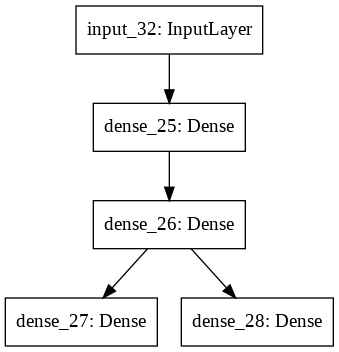

In [77]:
plot_model(model)

### 서브클래싱(Subclassing)
- 커스터마이징에 최적화된 방법

- Model 클래스를 상속받아 Model이 포함하는 기능을 사용할 수 있음  
  - `fit()`, `evaluate()`, `predict()`
  - `save()`, `load()`

- 주로 `call()` 메소드안에서 원하는 계산 가능
  - for, if, 저수준 연산 등

- 권장되는 방법은 아니지만 어떤 모델의 구현 코드를 참고할 때  
  해석할 수 있어야함

## 모델 가중치 확인

모델의 레이어들이 리스트로 표현됨


위의 layer name 참고

## 모델 컴파일(compile)

- 모델을 구성한 후, 사용할 손실함수(loss), 옵티마이저(optimizer)를 지정


### 참고1

#### loss
- `keras.losses.sparse_categorical_crossentropy` 등과 같이 지정 가능
  - `sparse_categorical_crossentropy`  
    클래스가 배타적, 즉 MNIST 예제에서 (0, 1, 2, ..., 9)와 같은 방식으로 구분되어 있을 때 사용

  - `categorical_cross_entropy`
    클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용

  - `binary_crossentropy`
  이진 분류를 수행할 때 사용


#### optimizer
- `keras.optimizer.SGD()` 등과 같이 사용 가능
  - 보통 옵티마이저의 튜닝을 위해 따로 객체를 생성하여 컴파일    
        optimizer = keras.optimizer.SGD(learning_rate=1e-5)  
        model.compile(...,
                      optimizer=optimzer,
                      ...)

- `keras.optimizer.Adam()` 도 많이 사용

#### metrics
- 모니터링할 지표

- 주로 'accuracy', 'acc'로도 가능


### 참고2 - 컴파일 설정 예시
- 평균 제곱 오차 회귀 문제  
      model.compile(loss = 'mse',  
                    optimizer = RMSprop(),  
                    metrics=['mae'])

- 이진 분류
      model.compile(loss = 'binary_crossentropy',  
                    optimizer = RMSprop(),  
                    metrics=['accuracy])



- 다항 분류
      model.compile(loss = 'categorical_crossentropy',  
                    optimizer = RMSprop(),  
                    metrics=['accuracy])
 


## 모델 훈련, 평가 및 예측
- `fit()` 함수

  - train_data(학습 데이터), train_label(데이터의 정답)
  
  - epochs
  
  - batch_size
  
  - validation_data

- `evaluate()` 함수
  - 테스트 데이터


- `predict()`
  임의의 데이터를 인자로 넣어 예측 가능

## MNIST 예제를 통해 모델 구성하기

- keras.datasets 에 포함되어 있는 데이터셋

  <img src="https://storage.googleapis.com/tfds-data/visualization/fig/mnist-3.0.1.png" width="400">

  <sub>출처: https://www.tensorflow.org/datasets/catalog/mnist</sub>

### modules import

### 데이터셋 로드
- MNIST 데이터셋을 로드

- Train Data 중, 30%를 검증 데이터(valiation data)로 사용


### 데이터 확인

### 데이터 전처리
- Normalization

### 모델 구성 (Sequential)

### 모델 컴파일

### 모델 학습
- 모델 시각화를 위해 history라는 변수에 학습 과정을 담음

### 학습 결과 시각화

### 모델 평가 (1)
- evaluate

### 학습된 모델을 통해 값 예측

### 모델 평가 (2)
- 혼동행렬 (Confusion Maxtrix)

### 모델 평가 (3)
- 분류 보고서

## 모델 저장과 복원
- `save()`

- `load_model()`

- (주의)  
  시퀀셜 API, 함수형 API에서는 **모델**의 저장 및 로드기 가능하지만 서브클래싱 방식으로는 할 수 없음  
  
  서브클래싱 방식
      save_weights()
      load_weights()  
  위 두가지를 통해 **모델의 파라미터**만 저장 및 로드


- JSON 형식
  - `model.to_json()` (저장)

  - `tf.keras.models.model_from_json(file_path)` (복원)

- YAML로 직렬화
  - `model.to_yaml()` (저장)

  - `tf.keras.models.model_from_yaml(file_path)` (복원)


## 콜백 (Callbacks)

- `fit()` 함수의 callbacks 매개변수를 사용하여 케라스가 훈련의 시작이나 끝에 호출할 객체 리스트를 지정할 수 있음

- 여러 개 사용 가능

- ModelCheckpoint
  - `tf.keras.callbacks.ModelCheckpoint`
  - 정기적으로 모델의 체크포인트를 저장하고, 문제가 발생할 때 복구하는데 사용

- EarlyStopping
  - `tf.keras.callbacks.EarlyStopping`
  - 검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때 사용

- LearningRateSchduler
  - `tf.keras.callbacks.LearningRateSchduler`
  - 최적화를 하는 동안 학습률(learning_rate)를 동적으로 변경할 때 사용

- TensorBoard
  - `tf.keras.callbacks.TensorBoard`
  - 모델의 경과를 모니터링할 때 사용


### ModelCheckpoint

최상의 모델만을 저장
- save_best_only=True

### EarlyStopping
- 일정 에포크(patience) 동안 검증 세트에 대한 점수가 오르지 않으면 학습을 멈춤

- 모델이 향상되지 않으면 학습이 자동으로 중지되므로,  
  에포크(epochs) 숫자를 크게 해도 무방

- 학습이 끝난 후의 최상의 가중치를 복원하기 때문에 모델을 따로 복원할 필요없음

### LearningRateScheduler

### Tensorboard
- 텐서보드를 이용하여 학습과정 모니터링

텐서보드를 사용하기 위해 logs폴더를 만들고, 학습이 진행되는 동안 로그 파일을 생성

load하는데 시간 소요

- load가 안된다면 port번호를 바꿔서 실행!  
  ex) %tensorboard --logdir {log_dir} port 8000